# Modeling

In [1]:

import numpy as np
import matplotlib.pyplot as plt

import pandas as pd

import warnings
warnings.filterwarnings("ignore")

data = pd.read_csv('data.csv')



In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Step 1: Prepare the Data
# Selecting relevant features and target variable
features = ['passenger_count', 'trip_distance', 
        'tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin', 'dew', 'humidity',
       'precip', 'precipprob', 'precipcover', 'snow',
       'snowdepth', 'windgust', 'windspeed', 'winddir', 'sealevelpressure',
       'cloudcover', 'visibility', 'solarradiation', 'solarenergy', 'uvindex', 'moonphase']

subsample_data = data.sample(n=10000)

X = subsample_data[features]
y = subsample_data['total_amount']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 2: Train the Models

# Model 1: Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Model 2: Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Step 3: Compare Model Performance

# Predictions
y_pred_lr = lr_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)

# Evaluation Metrics
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Printing the results
model_comparison = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest'],
    'MAE': [mae_lr, mae_rf],
    'MSE': [mse_lr, mse_rf],
    'R-squared': [r2_lr, r2_rf]
})

model_comparison


,Model,MAE,MSE,R-squared
0,Linear Regression,4.643604,53.796164,0.882334
1,Random Forest,4.649047,55.713869,0.878139


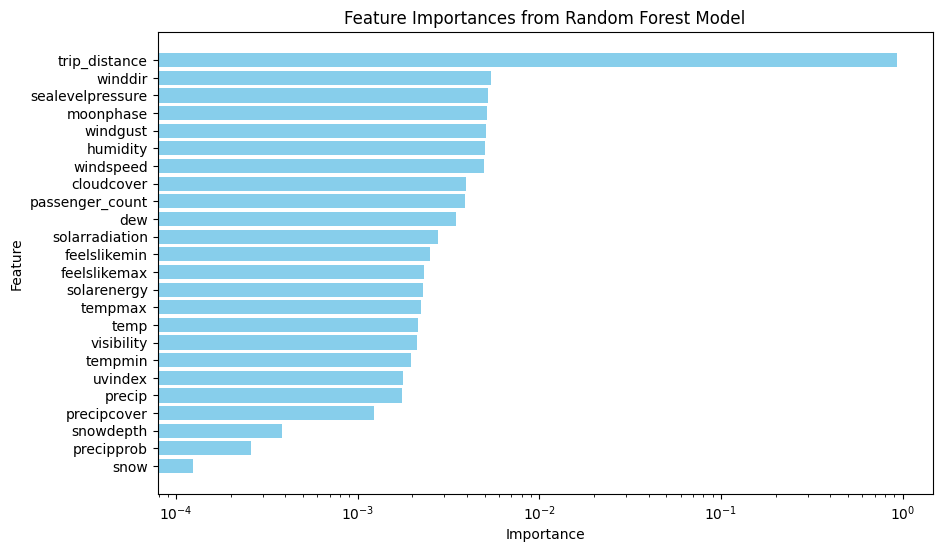

In [3]:
# Extract the feature importances
importances = rf_model.feature_importances_

# Create a DataFrame for easier plotting
feature_importances = pd.DataFrame({
    'Feature': features,
    'Importance': importances
})

# Sort the features by importance
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'], color='skyblue', log=True)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances from Random Forest Model')
plt.gca().invert_yaxis()  # To display the most important feature at the top
plt.show()


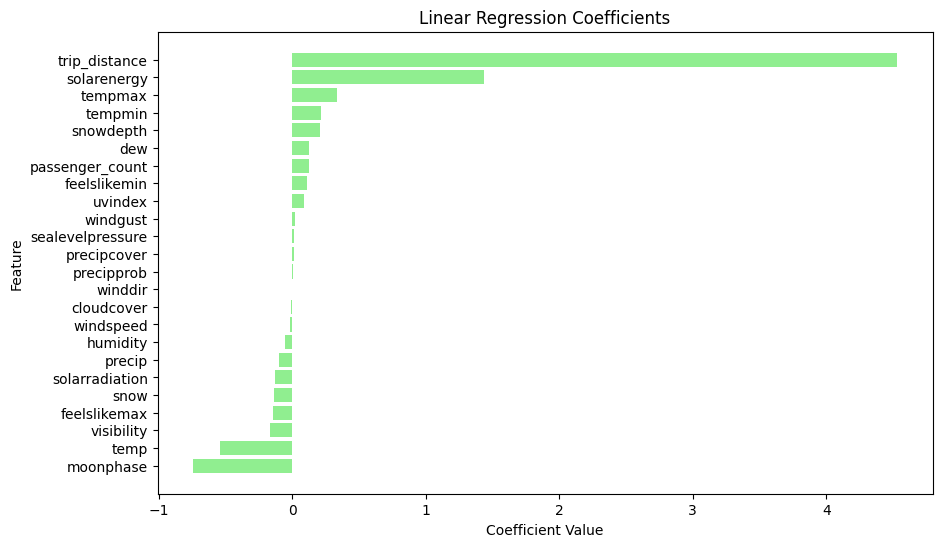

In [4]:
# Extract the coefficients
coefficients = lr_model.coef_

# Create a DataFrame for easier plotting
coef_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': coefficients
})

# Sort the coefficients by absolute value to better visualize impact
coef_df = coef_df.sort_values(by='Coefficient', ascending=False)

# Plot the coefficients
plt.figure(figsize=(10, 6))
plt.barh(coef_df['Feature'], coef_df['Coefficient'], color='lightgreen')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Linear Regression Coefficients')
plt.gca().invert_yaxis()  # To display the most impactful feature at the top
plt.show()


In [5]:
feature_importances

,Feature,Importance
1,trip_distance,0.934028
16,winddir,0.005427
17,sealevelpressure,0.005210
23,moonphase,0.005153
14,windgust,0.005069
8,humidity,0.005032
15,windspeed,0.004927
18,cloudcover,0.003930
0,passenger_count,0.003898
7,dew,0.003483


In [6]:
coef_df

,Feature,Coefficient
1,trip_distance,4.532442
21,solarenergy,1.432047
2,tempmax,0.332978
3,tempmin,0.216079
13,snowdepth,0.209070
7,dew,0.126811
0,passenger_count,0.123313
6,feelslikemin,0.111510
22,uvindex,0.087773
14,windgust,0.015848
